# __Librerias e importando el dataframe__

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import openai
import time
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from dotenv import load_dotenv


In [3]:
accidentes_df = pd.read_csv("AccidentesAviones.csv")

# __Analizando los datos__

In [4]:
# Visualizando el dataframe
accidentes_df.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [5]:
# El tipo de datos de cada columna
accidentes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5008 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

### __Cambiando los nombres de mis columnas__

Analisis de cada columna: lo que encontramos, el cambio realizado y formato.

1. fecha : Fecha ::: Esta en un formato April 21, 1945.

2. HORA declarada : Hora declarada :::  Formato 2205 un cambio del nombre de la columna a una forma normalizada

3. Ruta: Lugar de Accidente ::: Pasamos a iterar los diferentes registros y se realiza la localización de este valor y el valor del registro route; llegué a la conclución que este valor de "Ruta" es donde 
                                se estrello la aeronave.

4. OperadOR: Operador ::: Un cambio del nombre de la columna a una forma normalizada.

5. flight_no: Numero de vuelo ::: Solamente hubo una traducción del ingles al español para tener mejor comprensión.

6. route: Descripcion de la ruta ::: Visualizamos los diferentes valores y visualizando estas ciudades dentro de la aplicacion de google maps; definimos este valor como Descripción de la ruta.

7. ac_type: Tipo de aeronave ::: Solamente hubo una traducción del ingles al español para tener mejor comprensión.

8. registration: Identificador ::: Visualizando y realizando consulta a la diferente documentacion sobre accidentes aéreos; definimos este valor como un identificador.

9. cn_ln: Numero de fabricación ::: Visualizando y realizando consulta a la diferente documentacion sobre accidentes aéreos; definimos este valor como un numero de fabricación de cada aeronave.

Para los siguientes valores, se encontro que all_aboard, PASAJEROS A BORDO, crew_aboard. Y la suma de PASAJEROS A BORDO y crew_aboard nos da el total de all_aboard.

10. all_aboard : Total personas a bordo ::: Total de personas sin discriminar su función en la aeronave.

11. PASAJEROS A BORDO : Pasajeros ::: Personas que son personajes.
    
12. crew_aboard : Tripulación ::: Es la cantidad de personas que pertenecen a la tripulación.

Para los siguientes valores, cantidad de fallecidos, passenger_fatalities y crew_fatalities. Y la suma de passenger_fatalities y crew_fatalities nos da el total de cantidad de fallecidos.

13. cantidad de fallecidos: Total de fallecidos ::: Total de personas fallecidas sin entrar en una clasificacion a su función en la aeronave. 

14. passenger_fatalities: Pasajeros fallecidos ::: Total de pasajeros fallecidos.

15. crew_fatalities: Tripulación fallecidos ::: Total de personas pertenecientes a la tripulación fallecidos.

Finalmente tenemos:

16. ground: Víctimas en Tierra ::: Son aquellas victimas que no se encontraban en la aeronave sino en tierra realizando sus labores cotidianas.

17. summary: Descripción ::: Esta columna nos muestra la información y/o detalle del accidente.


In [10]:
# Cambiar el nombre de mis columnas - Normalizarlas

accidentes_df.rename(columns={"fecha": "Fecha"}, inplace=True)
accidentes_df.rename(columns={"HORA declarada": "Hora declarada"}, inplace=True)
accidentes_df.rename(columns={"Ruta": "Lugar de Accidente"}, inplace=True)
accidentes_df.rename(columns={"OperadOR": "Operador"}, inplace=True)
accidentes_df.rename(columns={"flight_no": "Numero de vuelo"}, inplace=True)
accidentes_df.rename(columns={"route": "Descripcion de la ruta"}, inplace=True)
accidentes_df.rename(columns={"ac_type": "Tipo de aeronave"}, inplace=True)
accidentes_df.rename(columns={"registration": "Identificador"}, inplace=True)
accidentes_df.rename(columns={"cn_ln": "Numero de fabricación"}, inplace=True)
accidentes_df.rename(columns={"all_aboard": "Total personas a bordo"}, inplace=True)
accidentes_df.rename(columns={"PASAJEROS A BORDO": "Pasajeros"}, inplace=True)
accidentes_df.rename(columns={"crew_aboard": "Tripulación"}, inplace=True)
accidentes_df.rename(columns={"cantidad de fallecidos": "Total de fallecidos"}, inplace=True)
accidentes_df.rename(columns={"passenger_fatalities": "Pasajeros fallecidos"}, inplace=True)
accidentes_df.rename(columns={"crew_fatalities": "Tripulación fallecidos"}, inplace=True)
accidentes_df.rename(columns={"ground": "Víctimas en Tierra"}, inplace=True)
accidentes_df.rename(columns={"summary": "Descripción"}, inplace=True)



In [9]:
# Algoritmo para visualizar los diferentes tipos de datos.

valor_fila = accidentes_df.iloc[2311]

# Visualizar los valores de esa fila como si fuera un diccionario o una serie de pandas
print(valor_fila)

# Visualizar el valor de una columna especifica
print(valor_fila["Descripción"])

Unnamed: 0                                                             2311
Fecha                                                     November 30, 1967
Hora declarada                                                         1430
Lugar de Accidente                             Near Qui Nhon, South Vietnam
Operador                                          Military - U.S. Air Force
Numero de vuelo                                                           ?
Descripcion de la ruta                                     Pleiku  Qui Nhon
Tipo de aeronave                           de Havilland Canada C-7A Caribou
Identificador                                                       62-4175
Numero de fabricación                                                     ?
Total personas a bordo                                                   26
Pasajeros                                                                22
Tripulación                                                               4
Total de fal

### __Tipos de datos__

Los tipos de valores debemos cambiarlo según el tipo de nombres, datos que tengamos en nuestro dataframe.


##### 1. Columna Fecha pasara a un formato: Año/Mes/Día

In [11]:
# Convierte la columna 'Fecha' en un objeto datetime y maneja valores vacíos
accidentes_df['Fecha'] = pd.to_datetime(accidentes_df['Fecha'], format='%B %d, %Y', errors='coerce')

# Formatea la columna 'Fecha' en el formato deseado (año/mes/día)
accidentes_df['Fecha'] = accidentes_df['Fecha'].dt.strftime('%Y/%m/%d')

##### 2. Columna Hora declarada a un formato: 24 horas

In [12]:
# Convierte la columna 'Hora declarada' en un objeto datetime
accidentes_df['Hora declarada'] = pd.to_datetime(accidentes_df['Hora declarada'], format='%H%M', errors='coerce').dt.strftime('%H:%M')



##### 3.  Convertir las columnas a tipo entero

In [13]:
# Convierte las columnas a tipo entero
columns_to_convert = [
    'Total personas a bordo',
    'Pasajeros',
    'Tripulación',
    'Total de fallecidos',
    'Pasajeros fallecidos',
    'Tripulación fallecidos',
    'Víctimas en Tierra'
]

accidentes_df[columns_to_convert] = accidentes_df[columns_to_convert].apply(pd.to_numeric, errors='coerce', downcast='integer')

### __Eliminación y analisis del completado de valores nulos a cada variable__

##### 1. Para cada columna 'Pasajeros fallecidos', 'Tripulación fallecidos', 'Total de fallecidos'

Se ha tomado la decisión de eliminar los registros en las columnas 'Pasajeros fallecidos', 'Tripulación fallecidos' y 'Total de fallecidos' en los casos en que todos los valores sean NaN o nulos. Esta decisión se fundamenta en la necesidad de identificar si un registro corresponde a un accidente aéreo en el que hubo víctimas tanto entre los pasajeros como entre la tripulación. Por lo tanto, es esencial que al menos una de estas columnas contenga información válida para que el registro sea relevante en el contexto de estos accidentes.

In [14]:
# Elimina las filas donde al menos una de las tres columnas mencionadas sea NaN
accidentes_df = accidentes_df.dropna(subset=['Pasajeros fallecidos', 'Tripulación fallecidos', 'Total de fallecidos'], how='all')
accidentes_df = accidentes_df.reset_index(drop=True)
accidentes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5000 non-null   int64  
 1   Fecha                   5000 non-null   object 
 2   Hora declarada          3287 non-null   object 
 3   Lugar de Accidente      5000 non-null   object 
 4   Operador                5000 non-null   object 
 5   Numero de vuelo         5000 non-null   object 
 6   Descripcion de la ruta  5000 non-null   object 
 7   Tipo de aeronave        5000 non-null   object 
 8   Identificador           5000 non-null   object 
 9   Numero de fabricación   5000 non-null   object 
 10  Total personas a bordo  4991 non-null   float64
 11  Pasajeros               4787 non-null   float64
 12  Tripulación             4789 non-null   float64
 13  Total de fallecidos     5000 non-null   float64
 14  Pasajeros fallecidos    4773 non-null   

Columna Pasajeros fallecidos y tripulación fallecidos

In [15]:
# Primero, identificamos las filas donde ambas columnas "Pasajeros fallecidos" y "Tripulación fallecidos" son nulas
filas_nulas = accidentes_df[(accidentes_df['Pasajeros fallecidos'].isnull()) & (accidentes_df['Tripulación fallecidos'].isnull())]

# Luego, iteramos sobre estas filas y aplicamos las sustituciones según las condiciones
for indice, fila in filas_nulas.iterrows():
    total_fallecidos = fila['Total de fallecidos']
    tripulacion_fallecidos = fila['Tripulación']
    
    if total_fallecidos > tripulacion_fallecidos:
        accidentes_df.at[indice, 'Tripulación fallecidos'] = tripulacion_fallecidos
        accidentes_df.at[indice, 'Pasajeros fallecidos'] = total_fallecidos - tripulacion_fallecidos
    else:
        accidentes_df.at[indice, 'Tripulación fallecidos'] = 0
        accidentes_df.at[indice, 'Pasajeros fallecidos'] = total_fallecidos -  accidentes_df.at[indice, 'Tripulación fallecidos']


In [16]:
# Verificar si la columna "Pasajeros fallecidos" no es nula y llenar "Total personas a bordo" con la suma
accidentes_df['Pasajeros fallecidos'].fillna(accidentes_df['Total de fallecidos'] - accidentes_df['Tripulación fallecidos'], inplace=True)


In [17]:
# Verificar si la columna "Pasajeros fallecidos" no es nula y llenar "Total personas a bordo" con la suma
accidentes_df['Tripulación fallecidos'].fillna(accidentes_df['Total de fallecidos'] - accidentes_df['Pasajeros fallecidos'], inplace=True)

In [18]:
accidentes_df.head()

,Unnamed: 0,Fecha,Hora declarada,Lugar de Accidente,Operador,Numero de vuelo,Descripcion de la ruta,Tipo de aeronave,Identificador,Numero de fabricación,Total personas a bordo,Pasajeros,Tripulación,Total de fallecidos,Pasajeros fallecidos,Tripulación fallecidos,Víctimas en Tierra,Descripción
0,0,1908/09/17,17:18,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,1909/09/07,NaN,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,2,1912/07/12,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,3,1913/08/06,NaN,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,4,1913/09/09,18:30,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20.0,NaN,NaN,14.0,14.0,0.0,0.0,The airship flew into a thunderstorm and encou...


##### 2. Columna Tripulación, Total pasajero a bordo y Pasajeros


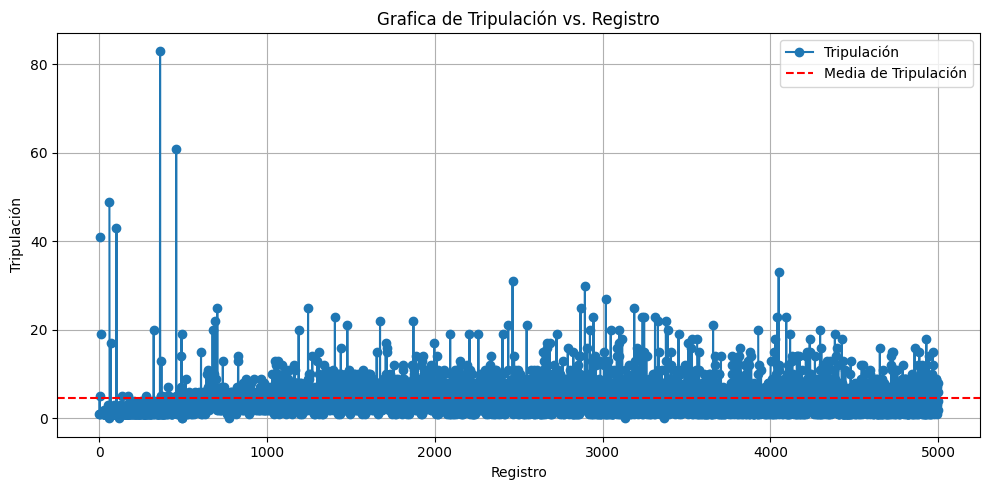

In [19]:
# Graficar la columna "Tripulación" contra el registro (índice)
plt.figure(figsize=(10, 5))
plt.plot(accidentes_df.index, accidentes_df['Tripulación'], label='Tripulación', marker='o')
plt.axhline(y=accidentes_df['Tripulación'].mean(), color='r', linestyle='--', label='Media de Tripulación')
plt.xlabel('Registro')
plt.ylabel('Tripulación')
plt.title('Grafica de Tripulación vs. Registro')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Según el grafico anterior de Tripulación, se logra apreciar que hay ciertos picos. Y para lo que concierne a los valores nulos, se decidio rellernalos la media y no perder información.

In [20]:
accidentes_df.head()

# Calcular la media de la columna "Tripulación"
media_tripulacion = accidentes_df['Tripulación'].mean()

# Obtener la parte entera de la media
media_tripulacion_entera = int(media_tripulacion)

print(media_tripulacion_entera)
# Llenar los valores nulos en "Tripulación" con la parte entera de la media
accidentes_df['Tripulación'].fillna(media_tripulacion_entera, inplace=True)




4


A continuación debemos completar los valores de las columnas Total personas a bordo y Pasajeros.
* Primero debemos completar la columnas Total a personas a bordo con la suma de Pasajeros y Tripulación. En caso, de que siga con valores nulos, entonces pasamos a completarlo con el valor de la columna Total de fallecidos.

* Finalmente el valor de la columna Pasajeros, se complementara mediante  la resta de Total personas a bordo - Tripulación.

In [21]:
# Verificar si la columna "Total personas a bordo" es nula entonce lo completamos con el valor de Pasajeros + Tripulación
accidentes_df['Total personas a bordo'].fillna(accidentes_df['Pasajeros'] + accidentes_df['Tripulación'], inplace=True)


In [22]:
# Verificar si la columna "Total personas a bordo" es nula y llenar "Total personas a bordo" con la suma
accidentes_df['Total personas a bordo'].fillna(accidentes_df['Total de fallecidos'], inplace=True)


In [23]:
# Verificar si la columna "Pasajeros"  es nula y llenar "Total personas a bordo" con la suma
accidentes_df['Pasajeros'].fillna(accidentes_df['Total personas a bordo'] - accidentes_df['Tripulación'], inplace=True)


##### 3. Columnas a eliminar

De acuerdo a nuestra bibliografia las siguientes columnas no tienen una influencia sobre los accidentes aéreos:
- Numero de vuelo
- Numero de fabricación
- Identificador

In [24]:
# Elimina la columna "Unnamed"
accidentes_df = accidentes_df.drop(columns=['Unnamed: 0', 'Numero de vuelo','Numero de fabricación','Identificador'])

In [25]:
accidentes_df.head()

,Fecha,Hora declarada,Lugar de Accidente,Operador,Descripcion de la ruta,Tipo de aeronave,Total personas a bordo,Pasajeros,Tripulación,Total de fallecidos,Pasajeros fallecidos,Tripulación fallecidos,Víctimas en Tierra,Descripción
0,1908/09/17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909/09/07,NaN,"Juvisy-sur-Orge, France",?,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912/07/12,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,1913/08/06,NaN,"Victoria, British Columbia, Canada",Private,?,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,1913/09/09,18:30,Over the North Sea,Military - German Navy,?,Zeppelin L-1 (airship),20.0,16.0,4.0,14.0,14.0,0.0,0.0,The airship flew into a thunderstorm and encou...


##### 4. Cambio de valores

Estos cambios se realizaron en las columnas Operador y Descripcion de la rutas, los valore inciales son el signo "?" entonces para tener una visualización correcta entonces decidí colocarle el nombre de Sin operador y Sin Ruta, respectivamente.

In [26]:
# Reemplazar "?" en la columna Operador y Descripcicon de la ruta
accidentes_df['Operador'] = accidentes_df['Operador'].replace('?', 'Sin Operador')
accidentes_df['Descripcion de la ruta'] = accidentes_df['Descripcion de la ruta'].replace('?', 'Sin Ruta')


# Reemplazar NaN por "Sin hora" en la columna "hora declarada"
accidentes_df['Hora declarada'].fillna('Sin hora', inplace=True)



# __Exportando el archivo__

In [27]:
# Grabando archivo
nombre_archivo = "data_procesada.csv"
accidentes_df.to_csv(nombre_archivo, index=False)


# __Buscando las relaciones entre nuestro Dataset__

In [28]:
accidentes_df.head()

,Fecha,Hora declarada,Lugar de Accidente,Operador,Descripcion de la ruta,Tipo de aeronave,Total personas a bordo,Pasajeros,Tripulación,Total de fallecidos,Pasajeros fallecidos,Tripulación fallecidos,Víctimas en Tierra,Descripción
0,1908/09/17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909/09/07,Sin hora,"Juvisy-sur-Orge, France",Sin Operador,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912/07/12,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,1913/08/06,Sin hora,"Victoria, British Columbia, Canada",Private,Sin Ruta,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,1913/09/09,18:30,Over the North Sea,Military - German Navy,Sin Ruta,Zeppelin L-1 (airship),20.0,16.0,4.0,14.0,14.0,0.0,0.0,The airship flew into a thunderstorm and encou...


In [29]:
accidentes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Fecha                   5000 non-null   object 
 1   Hora declarada          5000 non-null   object 
 2   Lugar de Accidente      5000 non-null   object 
 3   Operador                5000 non-null   object 
 4   Descripcion de la ruta  5000 non-null   object 
 5   Tipo de aeronave        5000 non-null   object 
 6   Total personas a bordo  5000 non-null   float64
 7   Pasajeros               5000 non-null   float64
 8   Tripulación             5000 non-null   float64
 9   Total de fallecidos     5000 non-null   float64
 10  Pasajeros fallecidos    5000 non-null   float64
 11  Tripulación fallecidos  5000 non-null   float64
 12  Víctimas en Tierra      4964 non-null   float64
 13  Descripción             5000 non-null   object 
dtypes: float64(7), object(7)
memory usage: 5

C:\Users\Administrador\AppData\Local\Temp\ipykernel_18392\379749063.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = accidentes_df.corr()


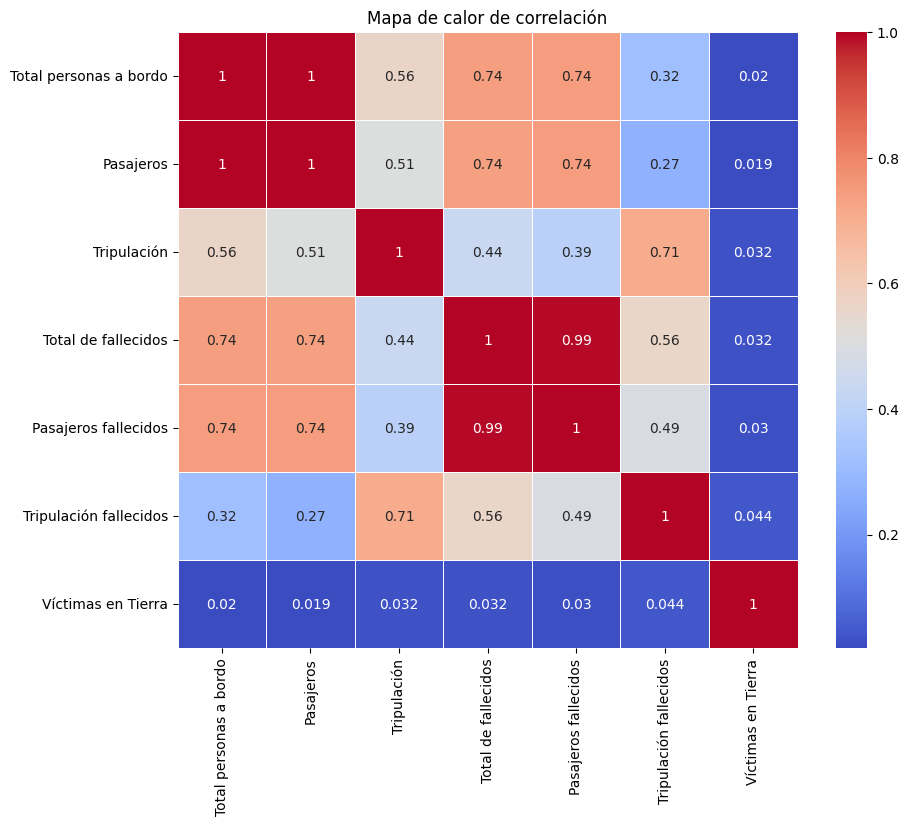

In [30]:
# Supongamos que tienes un DataFrame llamado df con tus datos
# Calcula la matriz de correlación
matriz_correlacion = accidentes_df.corr()

# Crea un mapa de calor (heatmap) para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de calor de correlación')
plt.show()

De acuerdo a la matrix del apartado anterior, se logra apreciar que las siguientes relaciones lineales:

1. Un Total de personas a bordo con Total de personas fallecidas.

2. Pasajeros Fallecidos con el total de pasajeros del avión.

3. Tripulación con los Fallecidos que pertenecen al grupo de Tripulación.

Seguidamente se aprecia que la relación de las victimas en Tierra, no tiene niguna relación proporcional con alguna variable.